# Disney+ Release Categories

## Introduction

Disney released its streaming service, Disney+, in 2019 and it has grown into an empire of Disney digital entertainment. From the classics such as _Snow White_ to the newest season of _The Mandalorian_, there is an incredible amount of content. Let's take a look into it.

## Overview

1. Import the data
2. Do some exploratory data analysis
3. Clean the data
4. Answer our questions:
    1. How many movies has Disney released each year, and has there been a change since Disney+ launched in 2019?
    2. What are all the categories that Disney has, and how many are there?
    3. How many releases does each category have?
    4. What percentage of all releases are in the top category?
    5. After Disney+ released, what categories are there now?
    6. Have the top 3 categories changed between the time period up to 2019 vs after?
    7. How have the categories changed by percentage between the time period up to 2019 vs after?
5. Conclusion

## Analysis

### Setup

This setup code came from our notebook assignments.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

%matplotlib inline

import matplotlib as mpl
mpl.rc("savefig", dpi=100) # Adjust for higher-resolution figures

### Import the dataset

Import the dataset, which is a csv file, as a pandas dataframe and do some exploratory data analysis. We will:
* Look at the top 5 entries to get a visual on the dataframe.
* Get the size of the dataframe to understand how big of a dataframe we're dealing with.
* Get the type for each column. This helps us determine which functions or operations we can perform on the columns. Or, whether we need to impute or change the type.
* Identify columns that have NaN values. We could get errors if there are NaN entries, so knowing where they are in advance will help us determine what to do with them.

Reference:
* [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
* [pandas.DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
* [pandas.DataFrame.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
* [pandas.DataFrame.isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)
* [pandas.DataFrame.any](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)
* [pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [2]:
disney = pd.read_csv('disney_plus_titles.csv')

# Display the data
print("The dataframe called disney:")
display(disney.head(5))

The dataframe called disney:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
print("The shape of the dataframe is:\n", disney.shape, "\n")

print("The dataframe column types are:\n", disney.dtypes, "\n")

print("The columns with NaN values are:")
display(disney.loc[:, disney.isna().any()])

The shape of the dataframe is:
 (1450, 12) 

The dataframe column types are:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object 

The columns with NaN values are:


,director,cast,country,date_added,rating
0,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",TV-G
1,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",PG
2,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",TV-G
3,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",TV-PG
4,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",NaN
...,...,...,...,...,...
1445,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",PG-13
1446,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",PG
1447,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",PG-13
1448,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",PG-13


### Clean the data

It looks like all values in the 'release_year' column are integers, which is what we want. Columns 'director', 'cast', 'country', 'date_added', and 'rating' all have NaN values, which we have to keep in mind if we are doing analysis on this dataset. 

Convert the 'date_added' column to a datetime type. Keep in mind that 'date_added' has NaN values.

Reference:
* [pandas.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
* [strftime() and strptime() Behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [4]:
print("Here are the rows that have NaN values in 'date_added':\n")
disney[disney['date_added'].isna()]

Here are the rows that have NaN values in 'date_added':



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [5]:
# Convert 'date_added' to a datetime type. Since there are only 3 rows that have NaN values, we will coerce the errors.

def year_to_datetime(df):
    return pd.to_datetime(disney['date_added'], errors = 'coerce')

year_to_datetime(disney)

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
4      2021-11-25
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1450, dtype: datetime64[ns]

On first inspection, it looks like there is a column named 'type'. However, 'type' is a reserve word in Python and may cause issues if we keep it. We will rename the column to 'release_type'.

In [6]:
disney = disney.rename(columns={'type': 'release_type'})

### How many movies has Disney released each year, and has there been a change since Disney+ launched in 2019?

Let's start off by figuring out how many movies Disney has been releasing each year. Then, we'll plot it.

This dataframe shows the number of movies released by year:


,release_year,movies
0,1928,1
1,1932,3
2,1933,3
3,1934,4
4,1935,4
...,...,...
85,2017,33
86,2018,32
87,2019,61
88,2020,74



Bar chart showing the number of Disney movies released by year:


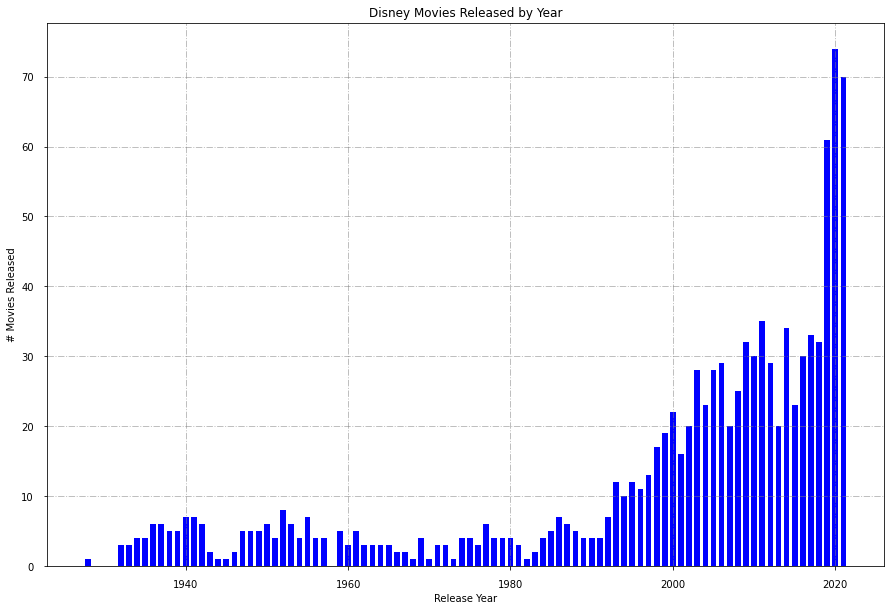

In [7]:
# Strategy:
#     - Filter by 'release_type' = movie
#     - Groupby on the dataframe by year and count the number of movies
#     - Use matplotlib to plot the graph

def movies_by_year(df):
#     output = df.copy().groupby('release_year')[df['release_type'] == 'Movie'].count()
    output = df.copy()
    output = output[output['release_type'] == 'Movie']
    output = output.groupby('release_year', as_index = False)['show_id'].count()
    return pd.DataFrame(output).rename(columns={'show_id':'movies'})

movies_df = movies_by_year(disney)
print("This dataframe shows the number of movies released by year:")
display(movies_df)


## Use matplotlib to plot the data in this dataframe as a bar chart.

print("\nBar chart showing the number of Disney movies released by year:")

# Set the figure size and axes
fig, ax = plt.subplots(figsize = (15, 10))

# Set the bar graph data, labels, and title
plt.bar(movies_df['release_year'], movies_df['movies'], color = 'blue', width = 0.7)
plt.xlabel("Release Year")
plt.ylabel("# Movies Released")
plt.title("Disney Movies Released by Year")

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.5)

# Show the plot
plt.show()


We can see a significant increase in quantity of movies since Disney+ launched in 2019. In fact, it's huge!

### What are all the categories that Disney has, and how many are there? 

Categories are in the column 'listed_in'.
* Return the categories as a list, sorted alphabetically.

In [8]:
def categories(df):
    df = df.copy()
    df_list = list(df['listed_in'])
    # get the unique categories using a set
    cat = set()
    for release in df_list:
        for item in release.split(','):
            cat.add(item.strip())
    # put the unique categories into a list and sort it alphabetically
    cat = list(cat)
    cat.sort()
    return cat

disney_categories = categories(disney)
print("The categories of Disney releases are:\n", disney_categories, "\n")
number_of_categories = len(disney_categories)
print(f"There are {number_of_categories} different categories for all Disney releases.\n")

The categories of Disney releases are:
 ['Action-Adventure', 'Animals & Nature', 'Animation', 'Anime', 'Anthology', 'Biographical', 'Buddy', 'Comedy', 'Coming of Age', 'Concert Film', 'Crime', 'Dance', 'Disaster', 'Documentary', 'Docuseries', 'Drama', 'Family', 'Fantasy', 'Game Show / Competition', 'Historical', 'Kids', 'Lifestyle', 'Medical', 'Movies', 'Music', 'Musical', 'Mystery', 'Parody', 'Police/Cop', 'Reality', 'Romance', 'Romantic Comedy', 'Science Fiction', 'Series', 'Soap Opera / Melodrama', 'Sports', 'Spy/Espionage', 'Superhero', 'Survival', 'Talk Show', 'Thriller', 'Travel', 'Variety', 'Western'] 

There are 44 different categories for all Disney releases.



### How many releases does each category have?

Disney is well-known for their family-friendly brand, so I expect the category around kids or family to be the top category.

* Return the number of releases in each category as a dictionary, where the keys are the categories and the counts as the values. Sort this in descending order from most releases to least.
* Then, put the dictionary in a dataframe where the keys are rows.

In [9]:
def category_counts(df):
    df_list = list(df['listed_in'])
    from collections import defaultdict
    d = defaultdict(int)
    # Loop over each line in the list, adding to the defaultdict
    for release in df_list:
        for item in release.split(','):
            d[item.strip()] += 1
    d = dict(sorted(dict(d).items(), key = lambda x: x[1], reverse = True))
    return d

def category_dict_to_df(dic):
    return pd.DataFrame.from_dict(dic, orient = 'index', columns=['releases']) \
.reset_index() \
.rename(columns={'index':'category'})


print("The number of releases in each category, sorted from highest to lowest, are:\n", category_counts(disney), "\n")
print("The number of releases in each category, as a dataframe:")
cat_df = category_dict_to_df(category_counts(disney))
display(cat_df)

The number of releases in each category, sorted from highest to lowest, are:
 {'Family': 632, 'Animation': 542, 'Comedy': 526, 'Action-Adventure': 452, 'Animals & Nature': 208, 'Coming of Age': 205, 'Fantasy': 192, 'Documentary': 174, 'Kids': 141, 'Drama': 134, 'Docuseries': 122, 'Science Fiction': 91, 'Historical': 53, 'Music': 48, 'Musical': 44, 'Sports': 43, 'Biographical': 41, 'Buddy': 40, 'Anthology': 28, 'Reality': 26, 'Romance': 20, 'Superhero': 19, 'Crime': 16, 'Variety': 12, 'Mystery': 12, 'Game Show / Competition': 10, 'Survival': 9, 'Parody': 9, 'Lifestyle': 8, 'Concert Film': 7, 'Western': 7, 'Medical': 6, 'Dance': 6, 'Thriller': 5, 'Anime': 4, 'Movies': 3, 'Spy/Espionage': 3, 'Series': 3, 'Romantic Comedy': 2, 'Soap Opera / Melodrama': 2, 'Disaster': 2, 'Police/Cop': 1, 'Talk Show': 1, 'Travel': 1} 

The number of releases in each category, as a dataframe:


,category,releases
0,Family,632
1,Animation,542
2,Comedy,526
3,Action-Adventure,452
4,Animals & Nature,208
5,Coming of Age,205
6,Fantasy,192
7,Documentary,174
8,Kids,141
9,Drama,134


### What percentage of all releases are in the top category?

I think half of them (50%) should be in the top category. Let's see how my prediction holds.

In [10]:
top_cat = cat_df['category'][0]
top_cat_percent = round(cat_df['releases'][0] / disney.shape[0] * 100, 2)
print(f"The top category is {top_cat}, with {top_cat_percent}% of all releases falling into this category.")

The top category is Family, with 43.59% of all releases falling into this category.


I was correct that the top category is Family, but the percentage of releases (43.59%) came just shy of my 50% estimate. Still, it's not bad!

### After Disney+ released, what categories are there now?
We've seen a huge change since 2019. Let's see if the category distribution has changed too. Since Disney+ released in late 2019, we'll look at data from releases 2020 and after.

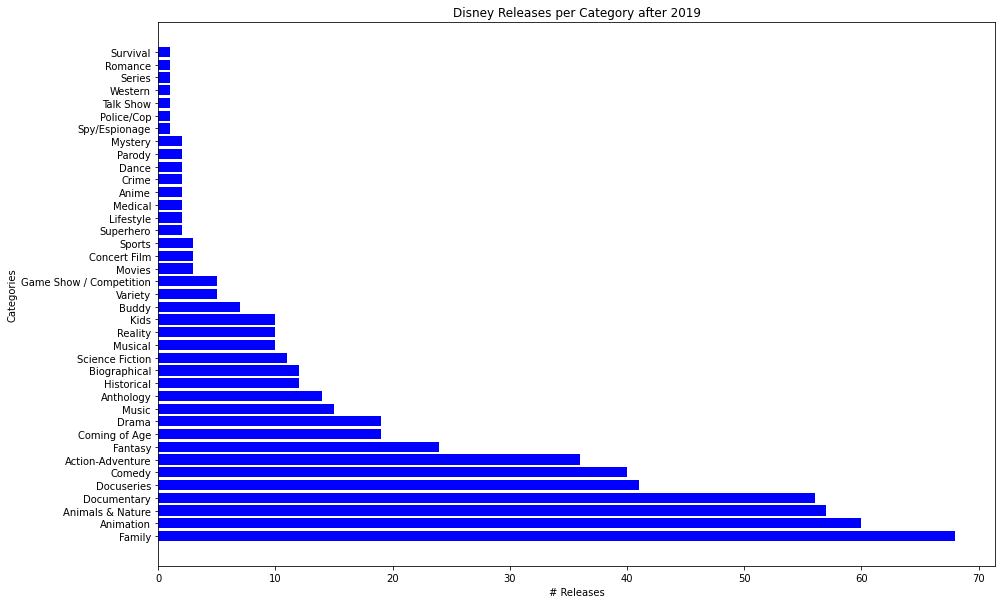

In [11]:
# Create a new dataframe with only the releases that were after 2019
disney_after_2019 = disney[disney['release_year'] > 2019]
after_2019_cat = category_counts(disney_after_2019)

fig2, ax2 = plt.subplots(figsize = (15, 10))
y_pos = np.arange(len(after_2019_cat.keys()))
ax2.barh(y_pos, after_2019_cat.values(), color = 'blue')
ax2.set_yticks(y_pos, labels = after_2019_cat.keys())
ax2.set_xlabel('# Releases')
ax2.set_ylabel('Categories')
ax2.set_title('Disney Releases per Category after 2019')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.5)

# Show the plot
plt.show()

### Have the top 3 categories changed between the time period up to 2019 vs after?

I still think Family should be the top category, but Animation has become huge over the past few years with technology advances so I expect that to move up.

In [12]:
# Create a new dataframe with only the releases that were before and including 2019
disney_up_to_2019 = disney[disney['release_year'] <= 2019]
up_to_2019_cat = category_counts(disney_up_to_2019)

print("Up to 2019, the top 3 categories were", list(up_to_2019_cat.keys())[:3])
print("After 2019, the top 3 categories were", list(after_2019_cat.keys())[:3])

Up to 2019, the top 3 categories were ['Family', 'Comedy', 'Animation']
After 2019, the top 3 categories were ['Family', 'Animation', 'Animals & Nature']


Looks like the top 3 categories did change since Disney+ released. Animation did move to #2 as expected, but Animals & Nature was unexpected. Maybe it's the National Geographic content? Who knows.

### How have the categories changed by percentage between the time period up to 2019 vs after?

Let's now calculate the proportion of each category so we can compare before and after Disney+ launched. The input is the dataframe filtered by date, and the output is a dataframe with the categories and their respective proportions, split between release year up to 2019 and after 2019.

In [13]:
percent_up_to_2019 = category_dict_to_df(category_counts(disney[disney['release_year'] <= 2019]))
percent_after_2019 = category_dict_to_df(category_counts(disney[disney['release_year'] > 2019]))

def releases_to_pct(df):
    df['releases'] = round(df['releases'] / df['releases'].sum() * 100, 2)
    df = df.rename(columns={'releases': 'percentage'})
    return df


pct_df = releases_to_pct(percent_up_to_2019) \
        .merge(releases_to_pct(percent_after_2019), how = 'outer', on = 'category') \
        .rename(columns = {'percentage_x' : 'pct_up_to_2019', 'percentage_y' : 'pct_after_2019'}) \
        .fillna(0) \
        .set_index('category', drop = True)
pct_df

,pct_up_to_2019,pct_after_2019
category,,
Family,16.85,12.08
Comedy,14.52,7.10
Animation,14.40,10.66
Action-Adventure,12.43,6.39
Coming of Age,5.56,3.37
Fantasy,5.02,4.26
Animals & Nature,4.51,10.12
Kids,3.91,1.78
Documentary,3.53,9.95


Let's plot this in a bar chart.

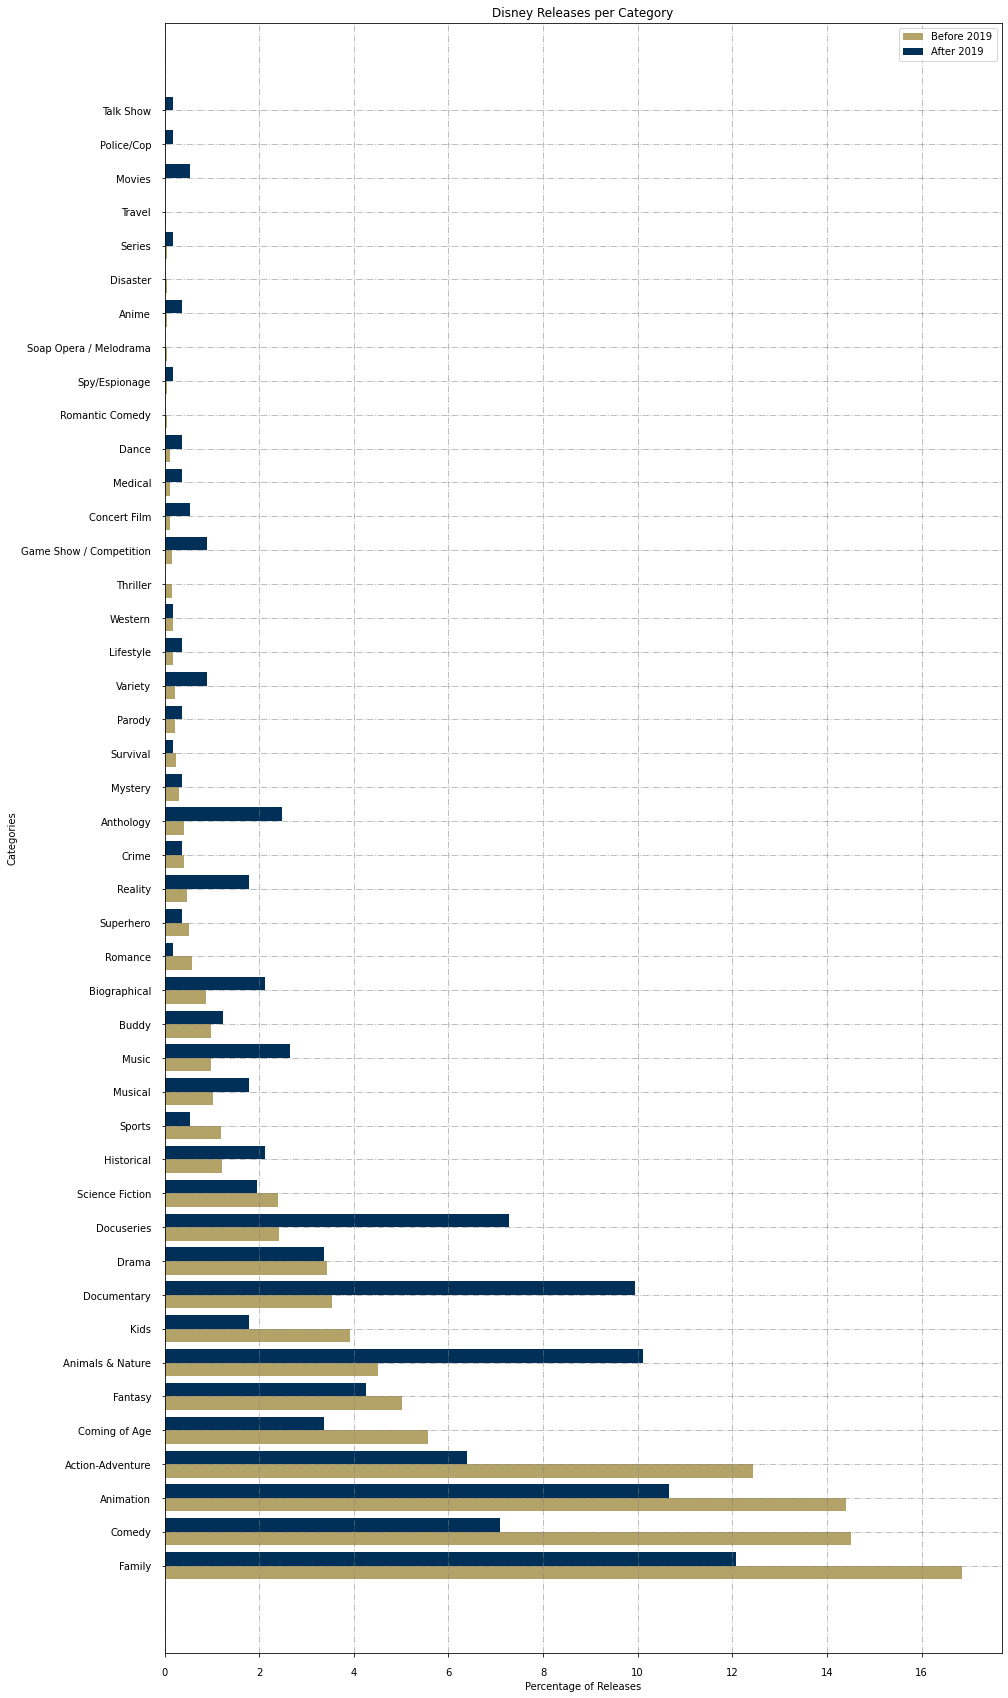

In [14]:
# Plot a grouped bar chart

Y_axis = np.arange(pct_df.shape[0])
width = 0.4

fig3, ax3 = plt.subplots(figsize = (15, 30))
ax3.barh(Y_axis - 0.2, pct_df['pct_up_to_2019'], width, color = '#B3A369', label = 'Before 2019')
ax3.barh(Y_axis + 0.2, pct_df['pct_after_2019'], width, color = '#003057', label = 'After 2019')
ax3.set_yticks(Y_axis, labels = pct_df.index)
ax3.set_xlabel('Percentage of Releases')
ax3.set_ylabel('Categories')
ax3.set_title('Disney Releases per Category')
ax3.legend()

# Add padding between axes and labels
ax3.xaxis.set_tick_params(pad = 10)
ax3.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax3.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.5)

# Show the plot
plt.show()

It looks like there have been significant increases in Docuseries, Documentary, and Animals & Nature categories since the launch of Disney+. There have also been decreases in Action-Adventure, Animation, Comedy, and Family.

## Conclusion

In our analysis of Disney+ releases, we answered 6 questions:
1. How many movies has Disney released each year, and has there been a change since Disney+ launched in 2019?
2. What are all the categories that Disney has, and how many are there?
3. How many releases does each category have?
4. What percentage of all releases are in the top category?
5. After Disney+ released, what categories are there now?
6. Have the top 3 categories changed between the time period up to 2019 vs after?
7. How have the categories changed by percentage between the time period up to 2019 vs after?

Each of these provided insights into the categories, both before and after Disney+ launched. It seems like the categories with the biggest increases are on brand with National Geographic, so Disney could be moving more towards that direction.

We were able to answer all the questions. We found that true to the Disney brand, Family was the predominant category for all Disney releases both before the Disney+ launch and after. For future research, we can take a look at who are the most "family-friendly" actors and directors to spot trends.

The biggest problem was that for purposes outside of our entertainment, the analysis we could get from this data was limited. If we add a dataset with ratings, we can rank the best releases to see which actors, directors, and categories get the best ratings. If there's a dataset with revenue, we could build a model to see which predictors were most likely to contribute to high revenue. Those insights are much more valuable to a business but that's for another day!